# KDD Data Analysis and Attack Classification using Machine Learning & Neural Networks

## Load the KDD dataset from URL

Based on the above code, write your own code to develop other ML or Neural network algorithms from list below.

Machine Learning Algorithms
**bold text**
Decision Tree Classifier:  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

K-Nearest Neighbors (KNN):  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Naive Bayes Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html


**Deep Learning Models**
Long Short-Term Memory (LSTM): https://keras.io/api/layers/recurrent_layers/lstm/

Convolutional Neural Networks (CNN): https://keras.io/api/layers/convolution_layers/convolution1d/

Transformers (Hugging Face Transformers)

**Important: Lab-Logbbok requirement**

Provide a bar graph comparing accuracy, precicion, recall, and f-score for various AI models



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the KDD dataset from URL
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot",
             "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
             "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
             "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
             "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
             "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]



In [3]:
df = pd.read_csv(url, names=col_names, compression='gzip')

# Sample 5000 rows to make training faster
df = df.sample(n=5000, random_state=42)

# Encoding categorical variables into numeric form
encoder = LabelEncoder()
categorical_columns = ['protocol_type', 'service', 'flag']
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Convert labels into binary classification (attack or normal)
df['label'] = df['label'].apply(lambda x: 'normal' if x == 'normal.' else 'attack')
df['label'] = encoder.fit_transform(df['label'])

# Feature Engineering: Creating new features
df['byte_ratio'] = df['src_bytes'] / (df['dst_bytes'] + 1)
df['total_count'] = df['count'] + df['srv_count']
df['error_rate'] = (df['serror_rate'] + df['rerror_rate']) / 2



In [4]:
# Splitting Data into Training and Testing Sets
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [5]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store performance metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["F1-Score"].append(f1_score(y_test, y_pred))
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}\n")



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       0.98      1.00      0.99       192

    accuracy                           1.00      1000
   macro avg       0.99      1.00      0.99      1000
weighted avg       1.00      1.00      1.00      1000


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       808
           1       0.97      0.99      0.98       192

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       0.98      0.98      0.98       192

    accuracy                           0.99      1000
   

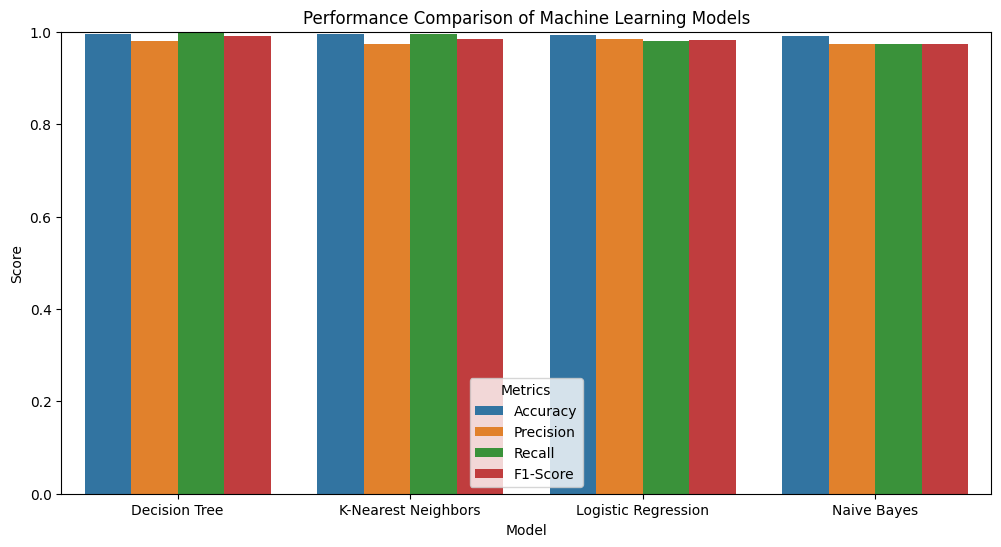

In [6]:
# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting the comparison bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="value", hue="variable", data=pd.melt(metrics_df, id_vars="Model"))
plt.title("Performance Comparison of Machine Learning Models")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Metrics")
plt.show()
